In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from  sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt  
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn import tree
import numpy as np


In [2]:
data = pd.read_csv("Titanic.csv",sep=";")

In [3]:
def encodage(X ):
    encoder = OneHotEncoder()
    X = encoder.fit_transform(X, y=None)
    return X


In [4]:
def chargement_categoriel(drop_col= None): #charge les données ,les encode,les divise et les convertis en listes 2D
    data = pd.read_csv("Titanic.csv",sep=";")
    X = data.drop(columns  = "Survived")
    if drop_col != None:
        X = data.drop(columns = drop_col)
        
    y = data["Survived"]
    y = y.values.reshape(-1,1)
    X = encodage(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    return [X_train, X_test, y_train, y_test]

In [5]:
def predict_tree(X_train,y_train,X_test):   
    model  = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [6]:
def graph(predictions,y_test):
    plt.scatter(range(len(y_test)),y_test,marker='o')
    plt.scatter(range(len(predictions)),predictions,marker='.',color="black")
    plt.xlabel('num')
    plt.ylabel('Survécu?')
    plt.show()


In [7]:
def error(predictions,y_test):
    print('Mean Absolute Error:', metrics.mean_absolute_error( y_test, predictions))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    return float(metrics.mean_absolute_error( y_test, predictions))

In [8]:
def chargement_test(drop_col= None): #chargmeent,mais les noms sont remplacés
    data = pd.read_csv("Titanic.csv",sep=";")
    X = data.drop(columns  = "Survived")
    if drop_col != None:
        X = data.drop(columns = drop_col)
    y = data["Survived"]
    y = y.values.reshape(-1,1)

    encoder = OneHotEncoder()
    encoder.fit(X, y=None)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    X_train = encoder.transform(X_train)  
    
    X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms
    X_test = encoder.transform(X_test)
    return [X_train, X_test, y_train, y_test]

In [9]:
def predict(mode=None,drop_col= None):  
    if mode == None:
        data = chargement_categoriel(drop_col) #mode normal
    else:
        data = chargement_test(drop_col) #mode noms changés
    #récupère les datasets
    X_train = data[0]
    X_test = data[1]
    y_train = data[2]
    y_test = data[3] 
    
    prediction = predict_tree(X_train,y_train,X_test)
    
    graph(prediction,y_test)
    
    return error(prediction,y_test)
    
    


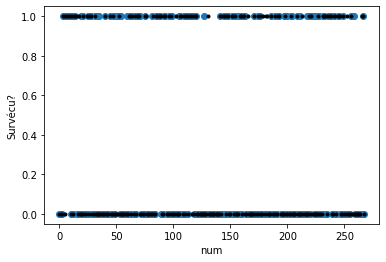

Mean Absolute Error: 0.19402985074626866
Mean Squared Error: 0.19402985074626866
Root Mean Squared Error: 0.44048819592160315
0.19402985074626866


In [10]:
print(predict(None,None))

# Vérifie la difference de précision si les noms sont changés

In [22]:
def precisionCompare():    
    tot1 = 0
    nb_loops = 10
    for i in range(nb_loops):
        tot1 += predict(None,None)

    tot2 = 0
    for i in range(nb_loops):
        tot2 += predict("Truc",None)
    print("Précision sans changer nom: "+ str( tot1/nb_loops))
    print("Précision après avoir changé nom: "+ str(tot2/nb_loops))
    print( tot2/nb_loops / tot1/nb_loops )
    return  (tot2 / tot1)

# Vérifie les probabilité de survie des différents groupes

In [19]:
data = pd.read_csv("Titanic.csv",sep=";")

def proba_survie_femme():
    taux_survie_femme = len(data[("female" == data.Sex) & (data.Survived == 1)]) / len(data[("female" == data.Sex)])
    taux_survie_homme = len(data[("male" == data.Sex) & (data.Survived == 1)]) / len(data[("male" == data.Sex)])
    print("Augmentation des chances de survie pour les femmes:" + str(taux_survie_femme/taux_survie_homme))
    return taux_survie_femme/taux_survie_homme

def proba_survie_riche():
    taux_survie_riche = len(data[( 1 == data.Pclass) & (data.Survived == 1)]) / len(data[ 1 == data.Pclass])
    taux_survie_pauvre = len(data[( 3 == data.Pclass) & (data.Survived == 1)]) / len(data[ 3== data.Pclass])
    print("Augmentation des chances de survie pour la classe supérieure: " + str(taux_survie_riche/taux_survie_pauvre))
    return taux_survie_riche/taux_survie_pauvre

def proba_survie_vip():
    moyenne_prix_billet = data["Fare"].mean()
    taux_survie_vip = len(data[(moyenne_prix_billet < data.Fare) & (data.Survived == 1)])  / len(data[moyenne_prix_billet < data.Fare])
    taux_survie_normal = len(data[(moyenne_prix_billet > data.Fare) & (data.Survived == 1)]) / len(data[moyenne_prix_billet > data.Fare])
    print("Augmentation des chances de survie pour les VIP:  " +str(taux_survie_vip /taux_survie_normal))
    return taux_survie_vip /taux_survie_normal

In [27]:
def test_precisionCompare():
    assert( precisionCompare() > 0.9 )
    
def test_proba_survie_femme():
    assert( proba_survie_femme() > 1 )

def test_proba_survie_rich():
    assert( proba_survie_riche() > 1 )
    
def proba_survie_vip():
    assert( proba_survie_vip() > 1 )

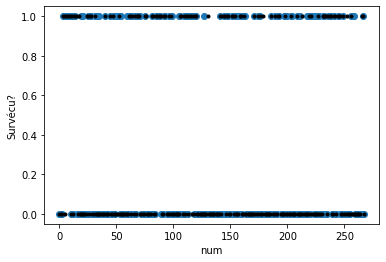

Mean Absolute Error: 0.1828358208955224
Mean Squared Error: 0.1828358208955224
Root Mean Squared Error: 0.4275930552470683


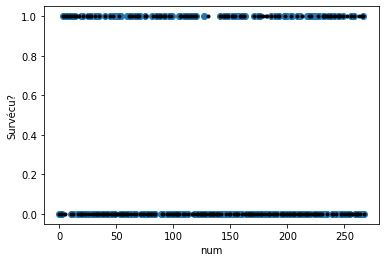

Mean Absolute Error: 0.1828358208955224
Mean Squared Error: 0.1828358208955224
Root Mean Squared Error: 0.4275930552470683


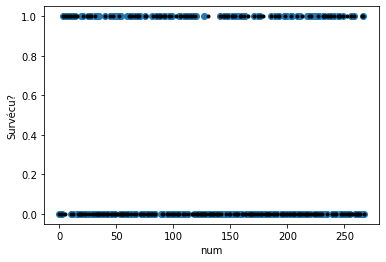

Mean Absolute Error: 0.1828358208955224
Mean Squared Error: 0.1828358208955224
Root Mean Squared Error: 0.4275930552470683


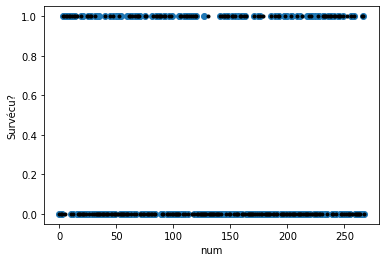

Mean Absolute Error: 0.1791044776119403
Mean Squared Error: 0.1791044776119403
Root Mean Squared Error: 0.42320736951515897


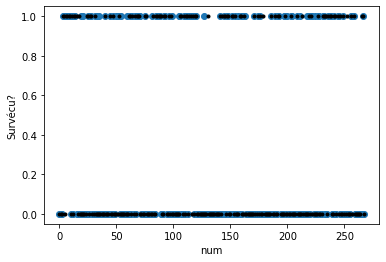

Mean Absolute Error: 0.1865671641791045
Mean Squared Error: 0.1865671641791045
Root Mean Squared Error: 0.43193421279068006


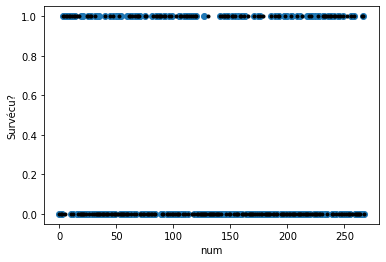

Mean Absolute Error: 0.19402985074626866
Mean Squared Error: 0.19402985074626866
Root Mean Squared Error: 0.44048819592160315


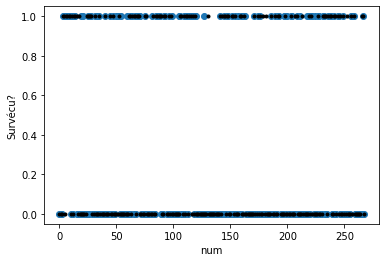

Mean Absolute Error: 0.20149253731343283
Mean Squared Error: 0.20149253731343283
Root Mean Squared Error: 0.4488792012484348


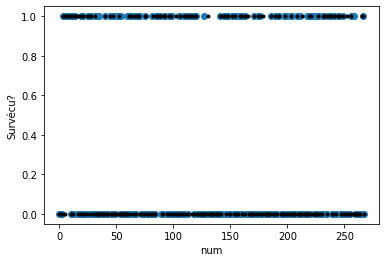

Mean Absolute Error: 0.1865671641791045
Mean Squared Error: 0.1865671641791045
Root Mean Squared Error: 0.43193421279068006


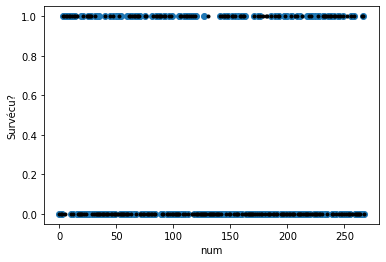

Mean Absolute Error: 0.19776119402985073
Mean Squared Error: 0.19776119402985073
Root Mean Squared Error: 0.4447034900131218


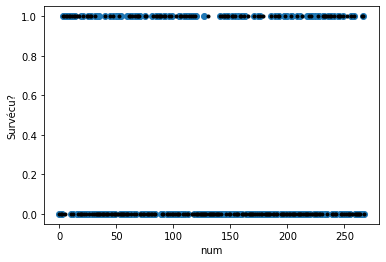

Mean Absolute Error: 0.19029850746268656
Mean Squared Error: 0.19029850746268656
Root Mean Squared Error: 0.436232171512701


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


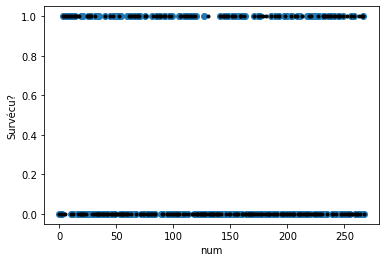

Mean Absolute Error: 0.20522388059701493
Mean Squared Error: 0.20522388059701493
Root Mean Squared Error: 0.4530164242022743


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


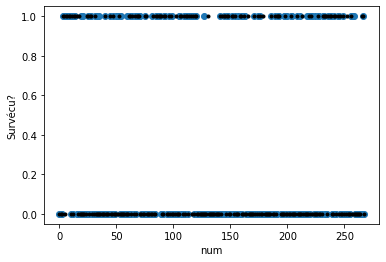

Mean Absolute Error: 0.20149253731343283
Mean Squared Error: 0.20149253731343283
Root Mean Squared Error: 0.4488792012484348


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


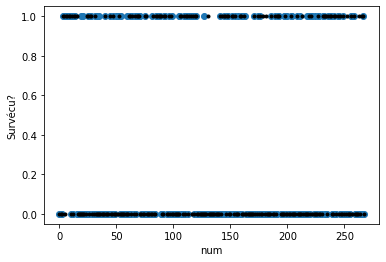

Mean Absolute Error: 0.19402985074626866
Mean Squared Error: 0.19402985074626866
Root Mean Squared Error: 0.44048819592160315


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


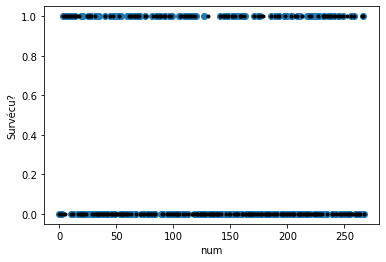

Mean Absolute Error: 0.20149253731343283
Mean Squared Error: 0.20149253731343283
Root Mean Squared Error: 0.4488792012484348


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


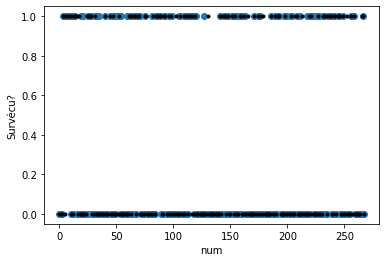

Mean Absolute Error: 0.20522388059701493
Mean Squared Error: 0.20522388059701493
Root Mean Squared Error: 0.4530164242022743


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


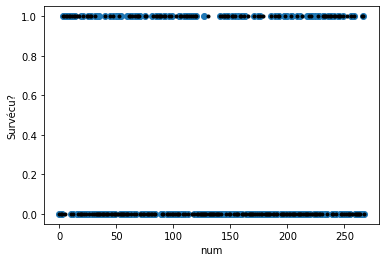

Mean Absolute Error: 0.1865671641791045
Mean Squared Error: 0.1865671641791045
Root Mean Squared Error: 0.43193421279068006


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


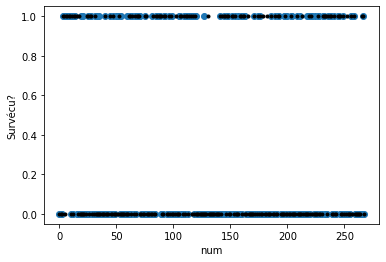

Mean Absolute Error: 0.19029850746268656
Mean Squared Error: 0.19029850746268656
Root Mean Squared Error: 0.436232171512701


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


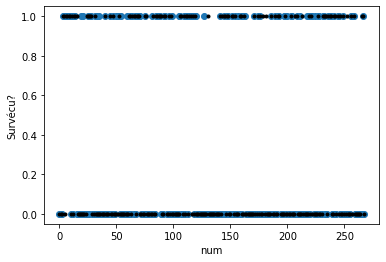

Mean Absolute Error: 0.20149253731343283
Mean Squared Error: 0.20149253731343283
Root Mean Squared Error: 0.4488792012484348


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


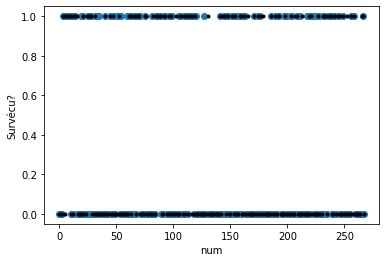

Mean Absolute Error: 0.20149253731343283
Mean Squared Error: 0.20149253731343283
Root Mean Squared Error: 0.4488792012484348


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


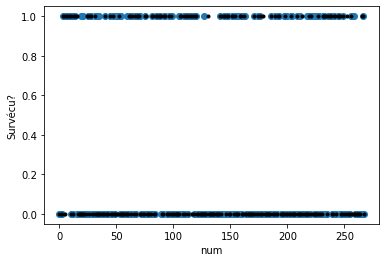

Mean Absolute Error: 0.1791044776119403
Mean Squared Error: 0.1791044776119403
Root Mean Squared Error: 0.42320736951515897
Précision sans changer nom: 0.1884328358208955
Précision après avoir changé nom: 0.19664179104477614
0.010435643564356436
Augmentation des chances de survie pour les femmes:3.928037164728569
Augmentation des chances de survie pour la classe supérieure: 2.597883597883598


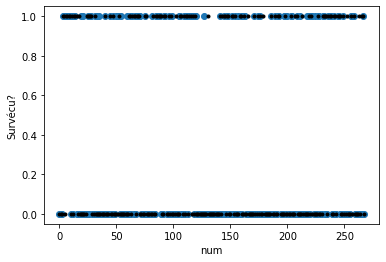

Mean Absolute Error: 0.208955223880597
Mean Squared Error: 0.208955223880597
Root Mean Squared Error: 0.45711620391383745


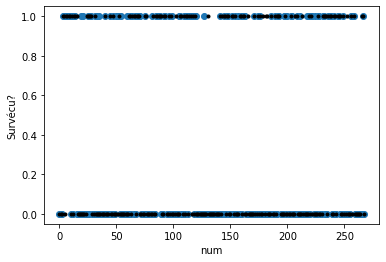

Mean Absolute Error: 0.208955223880597
Mean Squared Error: 0.208955223880597
Root Mean Squared Error: 0.45711620391383745


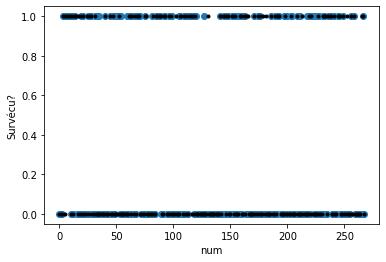

Mean Absolute Error: 0.19776119402985073
Mean Squared Error: 0.19776119402985073
Root Mean Squared Error: 0.4447034900131218


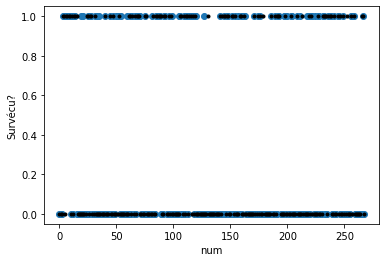

Mean Absolute Error: 0.1865671641791045
Mean Squared Error: 0.1865671641791045
Root Mean Squared Error: 0.43193421279068006


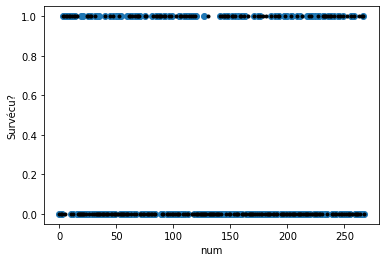

Mean Absolute Error: 0.20149253731343283
Mean Squared Error: 0.20149253731343283
Root Mean Squared Error: 0.4488792012484348


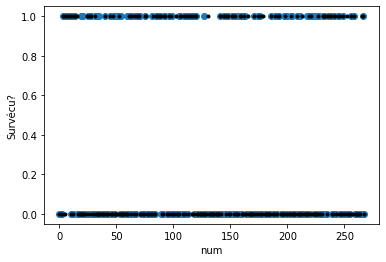

Mean Absolute Error: 0.19029850746268656
Mean Squared Error: 0.19029850746268656
Root Mean Squared Error: 0.436232171512701


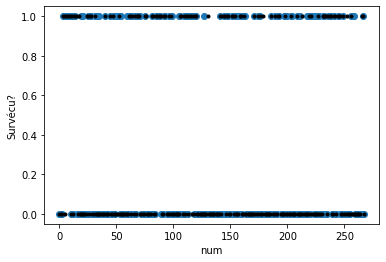

Mean Absolute Error: 0.1828358208955224
Mean Squared Error: 0.1828358208955224
Root Mean Squared Error: 0.4275930552470683


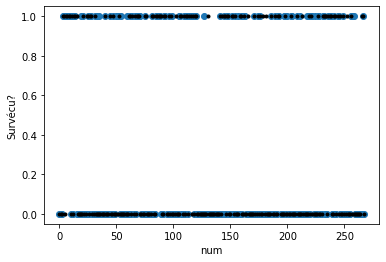

Mean Absolute Error: 0.19029850746268656
Mean Squared Error: 0.19029850746268656
Root Mean Squared Error: 0.436232171512701


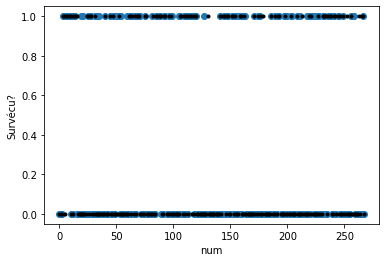

Mean Absolute Error: 0.19029850746268656
Mean Squared Error: 0.19029850746268656
Root Mean Squared Error: 0.436232171512701


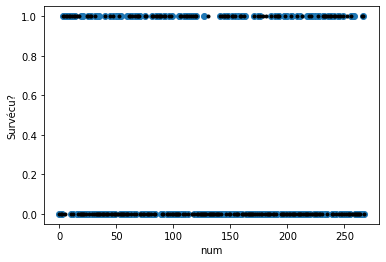

Mean Absolute Error: 0.19402985074626866
Mean Squared Error: 0.19402985074626866
Root Mean Squared Error: 0.44048819592160315


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


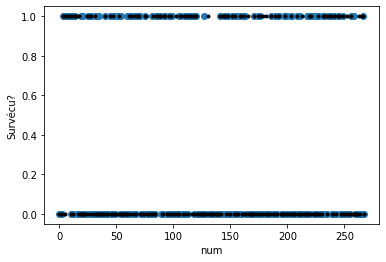

Mean Absolute Error: 0.20149253731343283
Mean Squared Error: 0.20149253731343283
Root Mean Squared Error: 0.4488792012484348


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


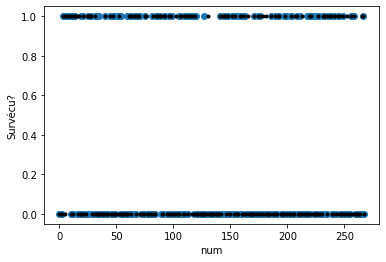

Mean Absolute Error: 0.208955223880597
Mean Squared Error: 0.208955223880597
Root Mean Squared Error: 0.45711620391383745


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


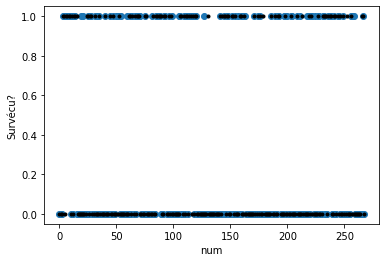

Mean Absolute Error: 0.1828358208955224
Mean Squared Error: 0.1828358208955224
Root Mean Squared Error: 0.4275930552470683


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


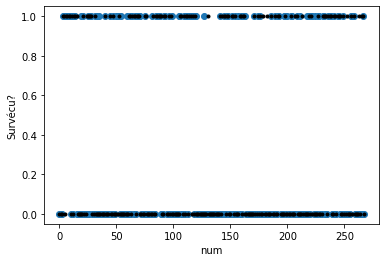

Mean Absolute Error: 0.19402985074626866
Mean Squared Error: 0.19402985074626866
Root Mean Squared Error: 0.44048819592160315


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


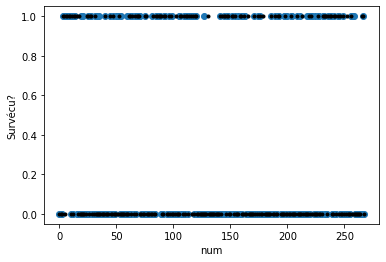

Mean Absolute Error: 0.19776119402985073
Mean Squared Error: 0.19776119402985073
Root Mean Squared Error: 0.4447034900131218


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


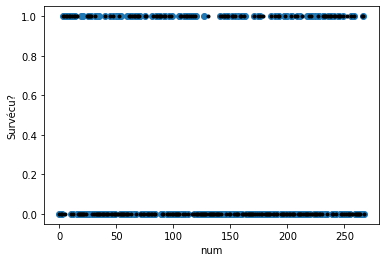

Mean Absolute Error: 0.19402985074626866
Mean Squared Error: 0.19402985074626866
Root Mean Squared Error: 0.44048819592160315


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


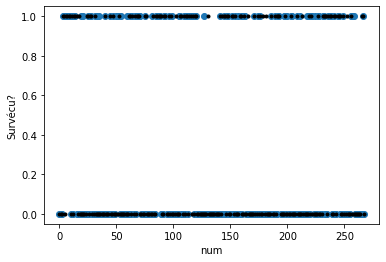

Mean Absolute Error: 0.20149253731343283
Mean Squared Error: 0.20149253731343283
Root Mean Squared Error: 0.4488792012484348


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


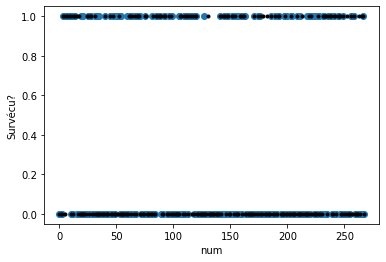

Mean Absolute Error: 0.1865671641791045
Mean Squared Error: 0.1865671641791045
Root Mean Squared Error: 0.43193421279068006


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


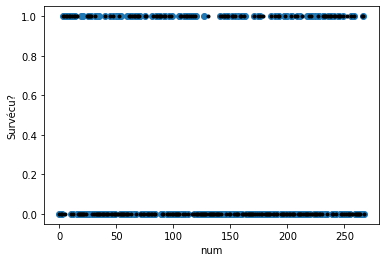

Mean Absolute Error: 0.19402985074626866
Mean Squared Error: 0.19402985074626866
Root Mean Squared Error: 0.44048819592160315


<ipython-input-8-8ec00a48eb3e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Name"] = "Braund, Mr. Owen Harris" #change tous les noms


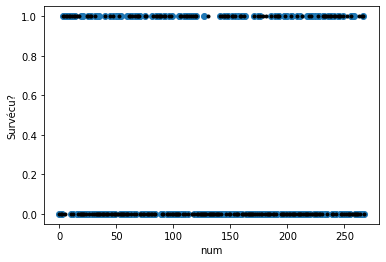

Mean Absolute Error: 0.19776119402985073
Mean Squared Error: 0.19776119402985073
Root Mean Squared Error: 0.4447034900131218
Précision sans changer nom: 0.1951492537313433
Précision après avoir changé nom: 0.1958955223880597
0.010038240917782028


In [28]:
test_precisionCompare()
test_proba_survie_femme()
test_proba_survie_rich()
test_proba_survie_vip()